## Final Notebook Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
%matplotlib inline

In [2]:
#Loading in the given data set into variable housing_df
housing_df = pd.read_csv('data/kc_house_data.csv')
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
# Checking to see if any columns in the dataframe have any NaN values
housing_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We see waterfront, view and yr_renocated columns are the only columns with NaN values.

In [4]:
# Grabbing the age of the home
housing_df['datetime'] = pd.to_datetime(housing_df['date'])
housing_df['soldyear'] = housing_df['datetime'].dt.year
housing_df['age_when_sold'] = housing_df['soldyear'] - housing_df['yr_built']

In [5]:
# Justt getting the numeric values of Graade
housing_df['grade_num'] = housing_df['grade'].str.split()
housing_df['grade_num'] = housing_df['grade_num'].str[0]
housing_df['grade_num'] = housing_df['grade_num'].astype(int)

In [6]:
# Creating a new column 'Basement' that will have a value of 1 or 0 in reference to whther a house has a basement or not.
housing_df['sqft_basement'] = housing_df['sqft_living'] - housing_df['sqft_above']
housing_df['Basement'] = None
housing_df['Basement'] = housing_df['sqft_basement'].map(lambda x: False if x == 0 else True)
housing_df['Basement'] = housing_df['Basement'].astype(int)

In [7]:
housing_df.condition.value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [8]:
# Changing all the values in the 'condition' column to integers.
replace_dict2 = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
housing_df['condition'] = housing_df['condition'].replace(replace_dict2)

In [9]:
wtr_col = housing_df[['waterfront']]
imputer = SimpleImputer(strategy='constant', fill_value = 'NO')
imputer.fit(wtr_col)
waterfront_imputed = imputer.transform(wtr_col)
housing_df.waterfront = waterfront_imputed

In [10]:
wtr_col = housing_df[['waterfront']]
encoder_wtr = OrdinalEncoder()
encoder_wtr.fit(wtr_col)
encoded_wtr = encoder_wtr.transform(wtr_col)
encoded_wtr = encoded_wtr.flatten()
housing_df.waterfront = encoded_wtr

In [11]:
view_col = housing_df[['view']]
imputer = SimpleImputer(strategy='constant', fill_value = 'NONE')
imputer.fit(view_col)
view_imputed = imputer.transform(view_col)
housing_df.view = view_imputed

In [12]:
housing_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
datetime            0
soldyear            0
age_when_sold       0
grade_num           0
Basement            0
dtype: int64

We don't see much usage in certain columns or we have already used the column information to its max and will no longer be needing them.

In [13]:
housing_ols = housing_df.drop(['datetime', 'date', 'soldyear', 'yr_built', 'lat', 'long',
 'sqft_above', 'sqft_lot15', 'sqft_living15', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated'], axis = 1)

In [14]:
housing_ols

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode,age_when_sold,grade_num,Basement
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,NONE,3,98178,59,7,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,NONE,3,98125,63,7,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,NONE,3,98028,82,6,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,NONE,5,98136,49,7,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,NONE,3,98074,28,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,NONE,3,98103,5,8,0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,NONE,3,98146,1,8,0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,NONE,3,98144,5,7,0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,NONE,3,98027,11,8,0


With new working dataframe we want to see how the remaining columns correlates to our target,price, as well as to other columns to check for collinearity

<AxesSubplot:>

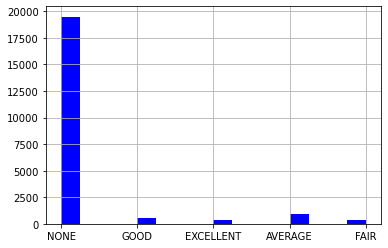

In [15]:
housing_ols['view'].hist(bins = "auto", color = 'b')

In [16]:
housing_ols['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [17]:
housing_ols.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,zipcode,age_when_sold,grade_num,Basement
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,-0.023803,-0.008211,-0.021458,0.008188,0.002585
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.036056,-0.053402,-0.053890,0.667951,0.180082
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,-0.154092,-0.155817,0.356563,0.162186
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,-0.204786,-0.507561,0.665838,0.162766
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,-0.199802,-0.318592,0.762779,0.204324
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,-0.129586,-0.052853,0.114731,-0.035227
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,-0.059541,-0.489514,0.458794,-0.256545
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.028923,0.024406,0.082818,0.040061
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,0.002888,0.360836,-0.146896,0.135211
zipcode,-0.008211,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,0.028923,0.002888,1.000000,0.347206,-0.185771,0.162861


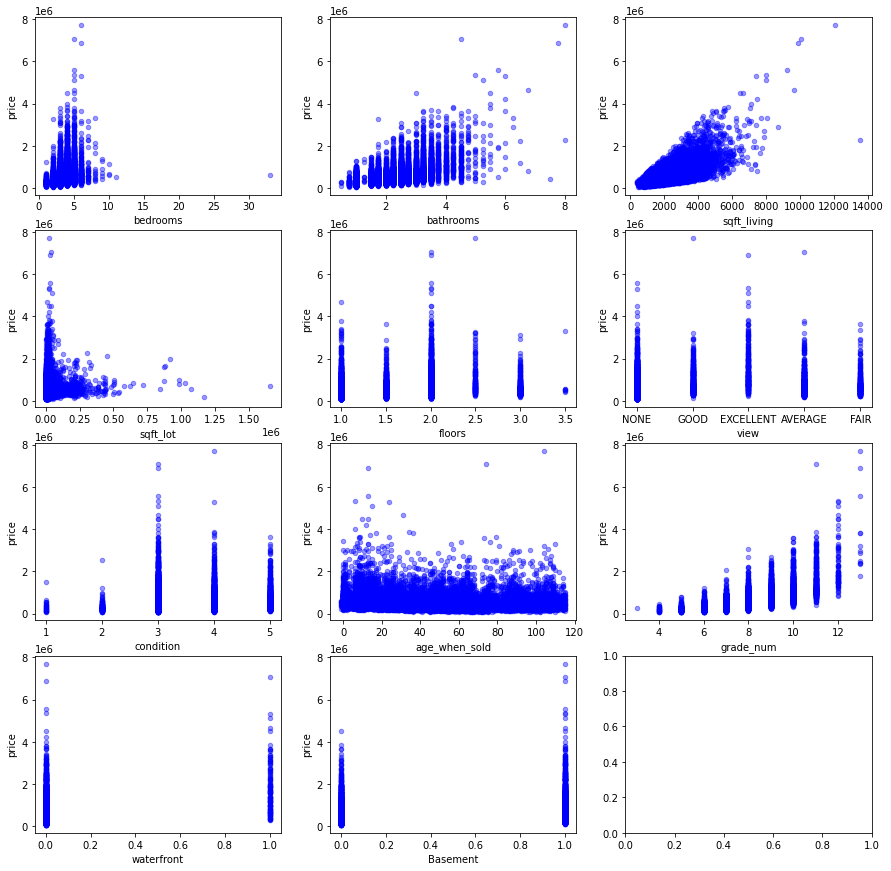

In [18]:
#Visually inspecting all columns association with price
fig, (axes1, axes2, axes3, axes4) = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living'], axes1):
    housing_ols.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
for xcols, axs in zip(['sqft_lot', 'floors', 'view'], axes2):
    housing_ols.plot(kind='scatter', x=xcols, y='price', ax=axs, alpha=0.4, color='b')
for xcolss, axss in zip(['condition', 'age_when_sold', 'grade_num'], axes3):
    housing_ols.plot(kind='scatter', x=xcolss, y='price', ax=axss, alpha=0.4, color='b')
for xcolss, axss in zip(['waterfront', 'Basement'], axes4):
    housing_ols.plot(kind='scatter', x=xcolss, y='price', ax=axss, alpha=0.4, color='b')

Many other columns are deemed as categorical values so with OneHotEncoder we will make columns for each of the categories found within each column and concat them all into one dataframe.

In [19]:
housing_pred = housing_ols.copy()
bedrooms_ohe = housing_pred[['bedrooms']]
ohe_bedrooms = OneHotEncoder(categories ='auto', sparse =False)
ohe_bedrooms.fit(bedrooms_ohe)
ohe_bedrooms_encoded = ohe_bedrooms.transform(bedrooms_ohe)
bedrooms_encoded_ohe = pd.DataFrame(ohe_bedrooms_encoded, columns = ohe_bedrooms.get_feature_names(['bedrooms']), index = housing_pred.index )
housing_pred1 = pd.concat([housing_pred, bedrooms_encoded_ohe ], axis =1)

In [20]:
grade_num_ohe = housing_pred[['grade_num']]
ohe_grade_num = OneHotEncoder(categories ='auto', sparse =False)
ohe_grade_num.fit(grade_num_ohe)
ohe_grade_num_encoded = ohe_grade_num.transform(grade_num_ohe)
grade_num_encoded_ohe = pd.DataFrame(ohe_grade_num_encoded, columns = ohe_grade_num.get_feature_names(['grade_num']), index = housing_pred.index )
housing_pred2 = pd.concat([housing_pred1, grade_num_encoded_ohe], axis =1)

In [21]:
condition_ohe = housing_pred[['condition']]
ohe = OneHotEncoder(categories="auto", sparse=False)
cond_encoded_ohe = pd.DataFrame (ohe.fit_transform(condition_ohe))
cond_encoded_ohe.columns = ohe.get_feature_names(['condition'])
housing_pred3 = pd.concat([housing_pred2, cond_encoded_ohe], axis = 1)

In [22]:
bathrooms_ohe = housing_pred[['bathrooms']]
ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
bathrooms_transform = ohe.fit_transform(bathrooms_ohe)
bathrooms_encoded_ohe = pd.DataFrame(bathrooms_transform, columns=ohe.get_feature_names(['bathrooms']), index=housing_pred.index)
housing_pred4 = pd.concat([housing_pred3, bathrooms_encoded_ohe], axis = 1)

In [23]:
view_ohe = housing_pred[['view']]
ohe = OneHotEncoder(categories="auto", sparse=False)
ohe.fit(view_ohe)
view_encoded = ohe.transform(view_ohe)
view_encoded_ohe =pd.DataFrame(view_encoded, columns=ohe.get_feature_names(['view']), index=housing_pred.index)
housing_pred5 = pd.concat([housing_pred4, view_encoded_ohe], axis = 1)

In [24]:
floors_ohe = housing_pred[['floors']]
ohe_floors = OneHotEncoder(categories ='auto', sparse =False)
ohe_floors.fit(floors_ohe)
ohe_floors_encoded = ohe_floors.transform(floors_ohe)
floors_encoded_ohe = pd.DataFrame(ohe_floors_encoded, columns = ohe_floors.get_feature_names(['floors']), index = housing_pred.index )
housing_pred6 = pd.concat([housing_pred5, floors_encoded_ohe ], axis =1)

In [25]:
zipcode_ohe = housing_pred[['zipcode']]
ohe = OneHotEncoder(categories="auto", sparse=False)
ohe.fit(zipcode_ohe)
zipcode_encoded = ohe.transform(zipcode_ohe)
zipcode_encoded_ohe =pd.DataFrame(zipcode_encoded, columns=ohe.get_feature_names(['zipcode']), index=housing_pred.index)
housing_pred_final = pd.concat([housing_pred6, zipcode_encoded_ohe ], axis =1)

In [26]:
housing_pred_final.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=152)

In [27]:
# Final dataframe after dealing with the catgoricals and dropping the original columns.
housing_pred_final.drop(['id', 'floors', 'bedrooms', 'bathrooms', 'view', 'condition', 'zipcode', 'grade_num'], axis = 1, inplace=True)

After creating new columns from OneHotEncoding many of the original columns we want to see if this will impact the correlation chart in reference to price.

In [28]:
housing_pred_final.corr()

,price,sqft_living,sqft_lot,waterfront,age_when_sold,Basement,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
price,1.000000,0.701917,0.089876,0.264306,-0.053890,0.180082,-0.057847,-0.144740,-0.184059,0.177351,...,-0.057217,-0.035762,-0.046074,-0.022561,-0.091703,0.040503,-0.069286,-0.054438,-0.074064,0.083688
sqft_living,0.701917,1.000000,0.173453,0.104637,-0.318592,0.204324,-0.124270,-0.350461,-0.273109,0.353324,...,-0.058106,-0.026323,-0.046455,-0.001475,-0.074826,0.028933,-0.042364,-0.024066,-0.041815,0.010832
sqft_lot,0.089876,0.173453,1.000000,0.021459,-0.052853,-0.035227,0.002243,-0.027755,-0.015102,0.026776,...,-0.017066,-0.007625,-0.016883,-0.003925,-0.010386,-0.008433,-0.018171,-0.009560,-0.012657,-0.028480
waterfront,0.264306,0.104637,0.021459,1.000000,0.024406,0.040061,0.015939,0.015811,-0.014085,-0.011549,...,0.019966,-0.004244,0.007887,0.064380,-0.009265,-0.003787,0.037313,-0.006567,0.035501,-0.005371
age_when_sold,-0.053890,-0.318592,-0.052853,0.024406,1.000000,0.167723,0.092855,0.203211,-0.025154,-0.130469,...,0.060473,0.013535,0.048731,0.049736,0.069794,0.037670,0.059367,0.015064,0.016741,0.060139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zipcode_98177,0.040503,0.028933,-0.008433,-0.003787,0.037670,0.042823,-0.001420,-0.005891,0.004309,-0.001156,...,-0.012708,-0.005623,-0.015873,-0.011925,-0.012276,1.000000,-0.012113,-0.008702,-0.012528,-0.013341
zipcode_98178,-0.069286,-0.042364,-0.018171,0.037313,0.059367,0.022552,-0.001685,0.022193,-0.012892,-0.004981,...,-0.012883,-0.005701,-0.016092,-0.012089,-0.012445,-0.012113,1.000000,-0.008822,-0.012700,-0.013525
zipcode_98188,-0.054438,-0.024066,-0.009560,-0.006567,0.015064,-0.001731,-0.007618,0.001087,-0.002190,-0.000424,...,-0.009255,-0.004095,-0.011560,-0.008684,-0.008940,-0.008702,-0.008822,1.000000,-0.009123,-0.009716
zipcode_98198,-0.074064,-0.041815,-0.012657,0.035501,0.016741,-0.007569,0.014929,0.012526,0.007919,-0.013373,...,-0.013324,-0.005896,-0.016642,-0.012503,-0.012871,-0.012528,-0.012700,-0.009123,1.000000,-0.013988


Since it is a far bigger dataframe can't visually inspect all the values to search for collinearity with the other predictors. Therefore have to colinear pairs another way. Any of the predictors with correlation of.75 or higher will be something that will have to be addressed.

In [29]:
# Breaking down the correlation table to find pairings of .75 or higher that aren't to our target price
df=housing_pred_final.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zipping the variable name columns in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# setting index to pairs
df.set_index(['pairs'], inplace = True)

#dropping level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# renaming correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates.
df.drop_duplicates(inplace=True)



df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(condition_4, condition_3)",0.812294
"(floors_1.0, floors_2.0)",0.775976


condition_4, condition_3 have correlation number of .812294 while floors_1, floors_2 have a correlation value of .775976

With our dataframe now dealt with we can now created our dummy regressor

In [30]:
# Putting our target in the X_dummy variable and the rest of the dataframe without price in the y_dummy variable
X_dummy = housing_pred_final['price']
y_dummy = housing_pred_final.drop('price', axis = 1)

In [31]:
# Splitting up our dummy variables into two subsets: for training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y_dummy, test_size=0.2, random_state=42)

In [32]:
# Setting up our dummy regressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)

DummyRegressor()

In [33]:
print(dummy_regr.score(X_train, y_train))
print(dummy_regr.score(X_test, y_test))

0.013986013986011344
-0.00028236347826728


We will now make a simple linear regressor model 

<AxesSubplot:>

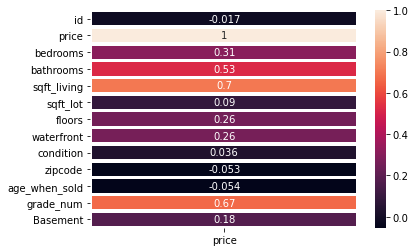

In [34]:
# Creating a heat map to decide which of our columns we will use as our independent variable to our dependent 
# variable price 
heat_map = housing_ols.corr()
heat_map_price = heat_map[['price']]
sns.heatmap(heat_map_price, annot=True, linewidths =2.5)

We can see from the heat map, that focuses on price, that sqft_living has the highest correlation to price.

In [35]:
simple_model_df = pd.concat([housing_pred_final['price'], housing_pred_final['sqft_living']], axis = 1)
X_simple = simple_model_df.drop('price', axis = 1)
y_simple = simple_model_df['price']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

In [37]:
simple_reg = LinearRegression()
simple_reg.fit(X_train, y_train)
print(simple_reg.score(X_train, y_train))
print(simple_reg.score(X_test, y_test))

0.49249290659878187
0.49332469237979504


In [38]:
y_hat_train = simple_reg.predict(X_train)
y_hat_test = simple_reg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 69086961740.93782
Test Mean Squarred Error: 65977373783.61759


In [39]:
multi_model_1 = pd.concat([housing_pred_final['price'], housing_pred_final['sqft_living'], view_encoded_ohe], axis = 1)
X_multi1 = multi_model_1.drop('price', axis = 1)
y_multi1 = multi_model_1['price']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_multi1, y_multi1, test_size=0.2, random_state=42)

In [41]:
multi1_reg = LinearRegression()
multi1_reg.fit(X_train, y_train)
print(multi1_reg.score(X_train, y_train))
print(multi1_reg.score(X_test, y_test))

0.5424908222182263
0.5435522225645002


In [42]:
y_hat_train = multi1_reg.predict(X_train)
y_hat_test = multi1_reg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 62280743407.36189
Test Mean Squarred Error: 59436931643.68158


In [43]:
multi_model_2 = pd.concat([housing_pred_final['price'], housing_pred_final['sqft_living'], view_encoded_ohe, cond_encoded_ohe], axis = 1)
X_multi2 = multi_model_2.drop('price', axis = 1)
y_multi2 = multi_model_2['price']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multi2, y_multi2, test_size=0.2, random_state=42)

In [45]:
multi2_reg = LinearRegression()
multi2_reg.fit(X_train, y_train)
print(multi2_reg.score(X_train, y_train))
print(multi2_reg.score(X_test, y_test))

0.5478229394408431
0.5451114161992303


In [46]:
y_hat_train = multi2_reg.predict(X_train)
y_hat_test = multi2_reg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 61554882067.98965
Test Mean Squarred Error: 59233899248.59054


In [47]:
multi_model_3 = pd.concat([housing_pred_final['price'], housing_pred_final['sqft_living'], zipcode_encoded_ohe], axis = 1)
X_multi3 = multi_model_3.drop('price', axis = 1)
y_multi3 = multi_model_3['price']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multi3, y_multi3, test_size=0.2, random_state=42)

In [49]:
multi3_reg = LinearRegression()
multi3_reg.fit(X_train, y_train)
print(multi3_reg.score(X_train, y_train))
print(multi3_reg.score(X_test, y_test))

0.7328746275271403
0.7158407143347644


In [50]:
y_hat_train = multi3_reg.predict(X_train)
y_hat_test = multi3_reg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 36363788069.21702
Test Mean Squarred Error: 37002165139.009026


In [51]:
multi_model_4 = pd.concat([housing_pred_final['price'], housing_pred_final['sqft_living'], zipcode_encoded_ohe, bathrooms_encoded_ohe], axis = 1)
X_multi4 = multi_model_4.drop('price', axis = 1)
y_multi4 = multi_model_4['price']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multi4, y_multi4, test_size=0.2, random_state=42)

In [53]:
multi4_reg = LinearRegression()
multi4_reg.fit(X_train, y_train)
print(multi4_reg.score(X_train, y_train))
print(multi4_reg.score(X_test, y_test))

0.7593855457499735
0.6979657661742273


In [54]:
# Bathrooms lead to overfit

In [55]:
multi_model_5 = pd.concat([housing_pred_final['price'], housing_pred_final['sqft_living'], zipcode_encoded_ohe, bedrooms_encoded_ohe], axis = 1)
X_multi5 = multi_model_5.drop('price', axis = 1)
y_multi5 = multi_model_5['price']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multi5, y_multi5, test_size=0.2, random_state=42)

In [57]:
multi5_reg = LinearRegression()
multi5_reg.fit(X_train, y_train)
print(multi5_reg.score(X_train, y_train))
print(multi5_reg.score(X_test, y_test))

0.7418669882820191
0.7263888168079438


In [58]:
y_hat_train = multi5_reg.predict(X_train)
y_hat_test = multi5_reg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 35139657625.50343
Test Mean Squarred Error: 35628630472.6966


In [59]:
multi_model_6 = pd.concat([housing_pred_final['price'], housing_pred_final['sqft_living'], zipcode_encoded_ohe, bedrooms_encoded_ohe, view_encoded_ohe], axis = 1)
X_multi6 = multi_model_6.drop('price', axis = 1)
y_multi6 = multi_model_6['price']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multi6, y_multi6, test_size=0.2, random_state=42)

In [61]:
multi6_reg = LinearRegression()
multi6_reg.fit(X_train, y_train)
print(multi6_reg.score(X_train, y_train))
print(multi6_reg.score(X_test, y_test))

0.7805888466129296
0.7605237505631132


In [62]:
y_hat_train = multi6_reg.predict(X_train)
y_hat_test = multi6_reg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 29868449439.787064
Test Mean Squarred Error: 31183706377.18099


In [63]:
multi_model_7 = pd.concat([housing_pred_final['price'], housing_pred_final['sqft_living'], housing_pred_final['waterfront'], zipcode_encoded_ohe, view_encoded_ohe, bedrooms_encoded_ohe], axis = 1)
X_multi7 = multi_model_7.drop('price', axis = 1)
y_multi7 = multi_model_7['price']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multi7, y_multi7, test_size=0.2, random_state=42)

In [65]:
multi7_reg = LinearRegression()
multi7_reg.fit(X_train, y_train)
print(multi7_reg.score(X_train, y_train))
print(multi7_reg.score(X_test, y_test))

0.7911726897062953
0.7743165151965006


In [66]:
y_hat_train = multi7_reg.predict(X_train)
y_hat_test = multi7_reg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 28427670439.11725
Test Mean Squarred Error: 29387663874.141567


In [67]:
multi_model_8 = pd.concat([housing_pred_final['price'], housing_pred_final['sqft_living'], housing_pred_final['waterfront'], housing_pred_final['Basement'], zipcode_encoded_ohe, view_encoded_ohe, bedrooms_encoded_ohe, cond_encoded_ohe, floors_encoded_ohe], axis = 1)
X_multi8 = multi_model_8.drop('price', axis = 1)
y_multi8 = multi_model_8['price']

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multi8, y_multi8, test_size=0.2, random_state=42)

In [69]:
multi8_reg = LinearRegression()
multi8_reg.fit(X_train, y_train)
print(multi8_reg.score(X_train, y_train))
print(multi8_reg.score(X_test, y_test))

0.7987394059886364
0.7819816688203198


In [70]:
y_hat_train = multi8_reg.predict(X_train)
y_hat_test = multi8_reg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 27397613036.768093
Test Mean Squarred Error: 28389536082.750057


In [71]:
cross_val_score(multi8_reg, X_train, y_train, cv=5)

array([0.79522696, 0.77482714, 0.80091842, 0.80963121, 0.78737221])

In [72]:
multi8_reg.coef_

array([ 2.62071766e+02,  5.71040298e+05, -6.73131948e+04, -2.29182609e+05,
       -2.10226069e+05, -2.12131212e+05,  5.74133834e+05,  1.35825630e+05,
        8.30433699e+04,  6.24842667e+04,  4.62550988e+04, -1.59221872e+05,
       -8.87510729e+04, -1.27109818e+05, -1.42015915e+05, -2.24700065e+05,
       -2.34424977e+05, -4.83711735e+04, -2.98531718e+04, -9.84887142e+04,
        2.39813734e+04, -2.13294012e+05, -2.00693116e+05, -2.11269885e+05,
        1.67855865e+05, -2.62288837e+03, -1.97926041e+05,  1.20783615e+06,
        3.51449915e+05, -2.14954880e+05, -1.22121972e+05,  3.68649502e+04,
       -1.65884362e+04, -1.71628214e+05, -1.28768198e+05, -1.78539942e+05,
       -1.33538730e+05, -1.51391211e+05, -2.08302231e+05, -4.58505261e+04,
       -4.59769494e+03, -7.37133013e+03, -5.84317885e+04, -2.44270364e+05,
        3.52390583e+05,  1.50952849e+05,  3.10434098e+05, -6.40545154e+04,
        1.64514613e+05, -8.31057412e+04,  3.53091858e+05,  4.90149041e+05,
        1.40030666e+05,  

In [73]:
housing_pred_final_no_corr = housing_pred_final.copy()
housing_pred_final_no_corr.drop(['condition_4', 'condition_3','floors_1.0', 'floors_2.0'], axis=1)

,price,sqft_living,sqft_lot,waterfront,age_when_sold,Basement,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,1180,5650,0.0,59,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,538000.0,2570,7242,0.0,63,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,180000.0,770,10000,0.0,82,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,1960,5000,0.0,49,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,1680,8080,0.0,28,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,1131,0.0,5,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,400000.0,2310,5813,0.0,1,0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,402101.0,1020,1350,0.0,5,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,400000.0,1600,2388,0.0,11,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
# Y = housing_pred_final_no_corr['price']
# X = housing_pred_final_no_corr.drop(['price'], axis=1)
# X = sm.add_constant(X)
# model = sm.OLS(Y,X)
# results = model.fit()



In [75]:
columns_to_scale  = ['sqft_living']
scaler = StandardScaler()
scaled_fit = scaler.fit(housing_ols[columns_to_scale])
scaled_columns = scaled_fit.transform(housing_ols[columns_to_scale])
scaled_columns = pd.DataFrame(scaled_columns)
scaled_columns.columns = columns_to_scale
scaled_columns

,sqft_living
0,-0.980652
1,0.533369
2,-1.427234
3,-0.131057
4,-0.436040
...,...
21592,-0.599424
21593,0.250171
21594,-1.154928
21595,-0.523178


In [76]:
formula = 'price ~ sqft_living + waterfront + C(zipcode) + C(view)'

model_ols_8 = ols(formula=formula, data=housing_ols).fit()

In [77]:
model_summary = model_ols_8.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     1037.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        08:24:43   Log-Likelihood:            -2.9088e+05
No. Observations:               21597   AIC:                         5.819e+05
Df Residuals:                   21521   BIC:                         5.825e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -6.965e+04   1.13e+04     -6.163      0.000   -9.18e+04   -4.75e+04
C(zipcode)[T.98002]   2.111e+04   1.51e+04      1.395      0.163   -8548.801    5.08e+04
C(zipcode)[T.98003]   1694.0541   1.36e+04      0.124      0.901   -2.51e+04    2.84e+04
C(zipcode)[T.98004]   8.298e+05   1.33e+04     62.525      0.000    8.04e+05    8.56e+05
C(zipcode)[T.98005]   3.568e+05    1.6e+04     22.247      0.000    3.25e+05    3.88e+05
C(zipcode)[T.98006]   3.139e+05   1.19e+04     26.304      0.000    2.91e+05    3.37e+05
C(zipcode)[T.98007]   2.774e+05    1.7e+04     16.299      0.000    2.44e+05    3.11e+05
C(zipcode)[T.98008]   2.654e+05   1.36e+04     19.488      0.000    2.39e+05    2.92e+05
C(zipcode)[T.98010]   8.977e+04   1.94e+04      4.636      0.000    5.18e+04    1.28e+05
C(zipcode)[T.98011]   1.314e+05   1.52e+04      8.626      0.000    1.02e+05    1.61e+05
C(zipcode)[T.98014]   1.222e+05   1.78e+04      6.853      0.000    8.73e+04    1.57e+05
C(zipcode)[T.98019]   8.768e+04   1.54e+04      5.708      0.000    5.76e+04    1.18e+05
C(zipcode)[T.98022]   2.208e+04   1.44e+04      1.529      0.126   -6225.613    5.04e+04
C(zipcode)[T.98023]  -1.936e+04   1.18e+04     -1.636      0.102   -4.26e+04    3840.555
C(zipcode)[T.98024]   1.941e+05   2.12e+04      9.165      0.000    1.53e+05    2.36e+05
C(zipcode)[T.98027]   1.905e+05   1.24e+04     15.381      0.000    1.66e+05    2.15e+05
C(zipcode)[T.98028]   1.241e+05   1.36e+04      9.123      0.000    9.75e+04    1.51e+05
C(zipcode)[T.98029]   2.467e+05   1.32e+04     18.750      0.000    2.21e+05    2.72e+05
C(zipcode)[T.98030]   6416.6664    1.4e+04      0.458      0.647    -2.1e+04    3.39e+04
C(zipcode)[T.98031]   1.872e+04   1.37e+04      1.362      0.173   -8214.050    4.57e+04
C(zipcode)[T.98032]   8435.7696   1.78e+04      0.474      0.635   -2.64e+04    4.33e+04
C(zipcode)[T.98033]   3.978e+05   1.22e+04     32.500      0.000    3.74e+05    4.22e+05
C(zipcode)[T.98034]     2.1e+05   1.16e+04     18.062      0.000    1.87e+05    2.33e+05
C(zipcode)[T.98038]    3.43e+04   1.15e+04      2.993      0.003    1.18e+04    5.68e+04
C(zipcode)[T.98039]   1.411e+06    2.6e+04     54.255      0.000    1.36e+06    1.46e+06
C(zipcode)[T.98040]   5.734e+05   1.38e+04     41.687      0.000    5.46e+05       6e+05
C(zipcode)[T.98042]   1.685e+04   1.16e+04      1.450      0.147   -5924.646    3.96e+04
C(zipcode)[T.98045]   1.127e+05   1.47e+04      7.690      0.000     8.4e+04    1.41e+05
C(zipcode)[T.98052]   2.583e+05   1.15e+04     22.407      0.000    2.36e+05    2.81e+05
C(zipcode)[T.98053]   2.348e+05   1.25e+04     18.844      0.000     2.1e+05    2.59e+05
C(zipcode)[T.98055]   5.027e+04   1.38e+04      3.639      0.000    2.32e+04    7.73e+04
C(zipcode)[T.98056]   1.048e+05   1.24e+04      8.454    

In [78]:
wtr_df = housing_ols.groupby(by = 'waterfront').mean().reset_index()

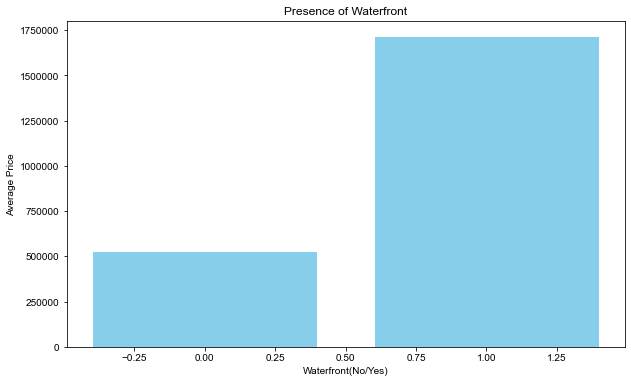

In [79]:
wtr_fig, ax = plt.subplots(figsize=(10,6))
sns.set_style("dark")

plt.bar(wtr_df['waterfront'], wtr_df['price'], color = 'skyblue')
plt.xlabel('Waterfront(No/Yes)')
plt.ylabel('Average Price')
plt.title('Presence of Waterfront')
ax.ticklabel_format(style='plain', axis = 'y');

In [80]:
base_df = housing_ols.groupby(by = 'Basement').mean().reset_index()
base_df

,Basement,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,zipcode,age_when_sold,grade_num
0,0,4.574492e+09,487068.905568,3.252326,2.015122,1929.390694,16273.161404,1.605492,0.004119,3.339054,98070.939817,39.358963,7.609535
1,1,4.589715e+09,622518.174384,3.559915,2.271386,2313.467539,13286.294922,1.322022,0.010840,3.519147,98088.783433,49.447037,7.732650


<BarContainer object of 2 artists>

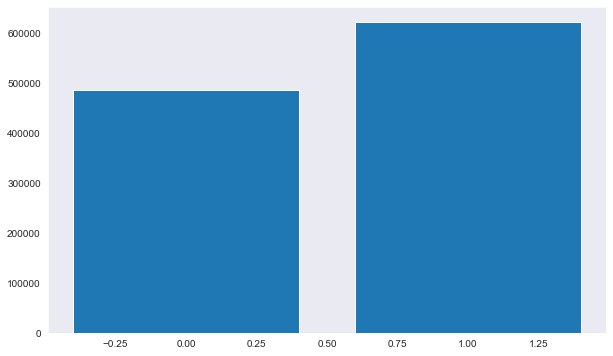

In [81]:
base_fig, ax = plt.subplots(figsize=(10,6))
sns.set_style("dark")

plt.bar(base_df['Basement'], base_df['price'])

In [82]:
view_df = housing_ols.groupby(by = 'view').mean().reset_index()
view_df.sort_values(by = 'price', ascending = True, inplace = True)
view_df

,view,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,zipcode,age_when_sold,grade_num,Basement
4,NONE,4.569482e+09,4.972107e+05,3.349038,2.071298,1999.175725,14169.354324,1.491198,0.000051,3.399795,98076.342212,42.705363,7.567052,0.361919
0,AVERAGE,4.780385e+09,7.913904e+05,3.567398,2.426594,2650.719958,22317.004180,1.513584,0.007315,3.492163,98090.940439,49.522466,8.315569,0.638454
2,FAIR,4.617411e+09,8.133733e+05,3.536364,2.350000,2571.045455,12370.596970,1.392424,0.003030,3.512121,98096.393939,51.448485,8.115152,0.733333
3,GOOD,4.340827e+09,9.732852e+05,3.671260,2.670276,3016.846457,34877.125984,1.564961,0.027559,3.474409,98092.064961,46.921260,8.730315,0.702756
1,EXCELLENT,4.998184e+09,1.452466e+06,3.624606,2.782334,3334.479495,21624.012618,1.605678,0.388013,3.567823,98095.864353,48.365931,9.063091,0.709779


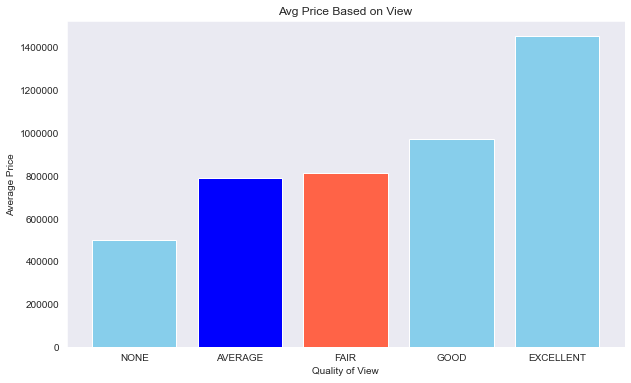

In [83]:
view_fig, ax = plt.subplots(figsize=(10,6))
sns.set_style("dark")
color = ['SkyBlue', 'blue', 'tomato', 'SkyBlue', 'SkyBlue']
plt.bar(view_df['view'], view_df['price'], color = color)
plt.ylabel('Average Price')
plt.xlabel('Quality of View')
plt.title('Avg Price Based on View')
ax.ticklabel_format(style='plain', axis = 'y');

In [84]:
cond_df = housing_ols.groupby(by = 'condition').mean().reset_index()
cond_df.sort_values(by = 'condition', ascending = True, inplace = True)
cond_df

,condition,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,zipcode,age_when_sold,grade_num,Basement
0,1,4.852763e+09,341067.241379,2.551724,1.215517,1247.931034,22174.379310,1.155172,0.034483,98094.862069,83.931034,5.965517,0.103448
1,2,4.167719e+09,328178.758824,2.858824,1.460294,1420.823529,32706.458824,1.158824,0.005882,98092.170588,65.500000,6.541176,0.329412
2,3,4.646031e+09,542173.057347,3.376748,2.223680,2149.205492,14746.596362,1.620150,0.005706,98078.648288,34.880742,7.827318,0.349786
3,4,4.457647e+09,521374.450414,3.357936,1.901092,1951.408843,16020.618813,1.261230,0.008103,98072.506606,55.967589,7.382596,0.454465
4,5,4.486675e+09,612577.742504,3.460317,2.024397,2022.911229,13052.582011,1.271605,0.010582,98088.675485,67.800118,7.320988,0.554968


<BarContainer object of 5 artists>

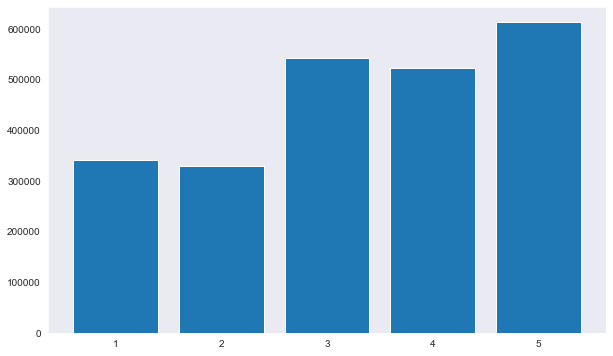

In [85]:
cond_fig, ax = plt.subplots(figsize=(10,6))
sns.set_style("dark")

plt.bar(cond_df['condition'], cond_df['price'])

In [86]:
floor_df = housing_ols.groupby(by = 'floors').mean().reset_index()
floor_df.sort_values(by = 'floors', ascending = True, inplace = True)
floor_df

,floors,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,zipcode,age_when_sold,grade_num,Basement
0,1.0,4.517502e+09,4.423584e+05,3.162466,1.752506,1732.619601,14546.515506,0.004966,3.551391,98081.192073,53.931135,7.150942,0.517568
1,1.5,4.549761e+09,5.590449e+05,3.506283,1.771728,1907.880628,16966.476440,0.008377,3.689529,98102.585340,79.206283,7.192670,0.386387
2,2.0,4.677970e+09,6.491856e+05,3.633880,2.623619,2571.412386,16137.975956,0.008379,3.187978,98065.362356,23.593078,8.360413,0.248452
3,2.5,4.578060e+09,1.061021e+06,3.987578,2.835404,3145.428571,17347.291925,0.012422,3.478261,98092.503106,52.956522,8.894410,0.503106
4,3.0,4.481488e+09,5.834339e+05,2.962357,2.495499,1789.418985,4471.864157,0.009820,3.036007,98109.855974,9.461538,8.163666,0.158756
5,3.5,2.974186e+09,9.102143e+05,3.428571,2.892857,2440.000000,2792.285714,0.000000,3.285714,98107.285714,23.714286,8.571429,0.142857


<BarContainer object of 6 artists>

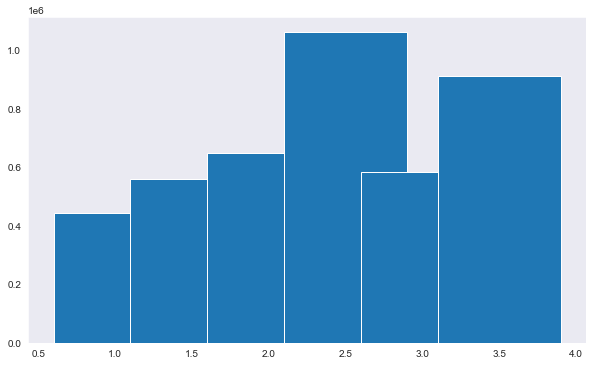

In [87]:
floor_fig, ax = plt.subplots(figsize=(10,6))
sns.set_style("dark")

plt.bar(floor_df['floors'], floor_df['price'])

In [88]:
bedr_df = housing_ols.groupby(by = 'bedrooms').mean().reset_index()
bedr_df.sort_values(by = 'bedrooms', ascending = True, inplace = True)
bedr_df

,bedrooms,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,zipcode,age_when_sold,grade_num,Basement
0,1,4.159083e+09,3.182395e+05,1.082908,888.153061,16070.035714,1.153061,0.020408,3.270408,98104.387755,71.826531,6.127551,0.158163
1,2,4.636499e+09,4.013877e+05,1.401721,1239.752899,12096.726087,1.306703,0.010145,3.377899,98105.953623,58.918841,6.871739,0.293841
2,3,4.535884e+09,4.662766e+05,1.968394,1805.837235,14414.790208,1.449410,0.005497,3.415513,98076.478217,42.514353,7.472516,0.362785
3,4,4.658470e+09,6.355647e+05,2.436428,2554.649666,16720.793374,1.616100,0.005376,3.406568,98069.749201,37.718832,8.116681,0.417030
4,5,4.517188e+09,7.868741e+05,2.778576,3047.545284,16769.022486,1.579638,0.011868,3.449094,98070.188007,40.119925,8.272330,0.612742
5,6,4.391720e+09,8.258535e+05,3.068015,3284.341912,18586.930147,1.606618,0.014706,3.470588,98079.463235,51.316176,8.080882,0.687500
6,7,4.027151e+09,9.514478e+05,3.651316,3974.210526,20840.552632,1.723684,0.000000,3.447368,98085.815789,51.368421,8.447368,0.578947
7,8,4.684170e+09,1.105077e+06,3.557692,3800.000000,8971.615385,1.692308,0.000000,3.538462,98081.846154,57.846154,8.076923,0.846154
8,9,5.465659e+09,8.939998e+05,4.416667,3775.000000,5480.000000,2.166667,0.000000,3.000000,98110.666667,82.833333,7.833333,0.833333
9,10,5.001934e+09,8.200000e+05,3.416667,3706.666667,8859.666667,1.666667,0.000000,3.666667,98038.333333,54.333333,7.666667,1.000000


<BarContainer object of 12 artists>

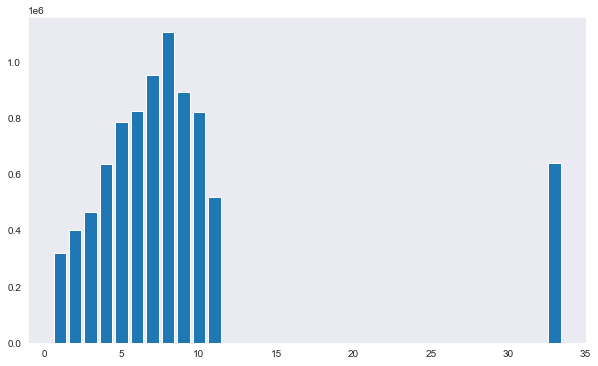

In [89]:
bedr_fig, ax = plt.subplots(figsize=(10,6))
sns.set_style("dark")

plt.bar(bedr_df['bedrooms'], bedr_df['price'])

In [90]:
zipcode_df = housing_ols.groupby(by = 'zipcode').mean().reset_index()
zipcode_df.sort_values(by = 'price', ascending = True, inplace=True)
zipcode_df

,zipcode,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,age_when_sold,grade_num,Basement
1,98002,4.850894e+09,2.342840e+05,3.326633,1.839196,1627.743719,7517.633166,1.334171,0.000000,3.743719,46.562814,6.693467,0.155779
64,98168,3.204785e+09,2.403284e+05,2.996283,1.433086,1468.624535,11269.843866,1.159851,0.000000,3.245353,61.579926,6.509294,0.368030
20,98032,4.548921e+09,2.512962e+05,3.392000,1.708000,1738.048000,10379.760000,1.220000,0.000000,3.632000,48.840000,7.144000,0.400000
0,98001,4.651274e+09,2.811949e+05,3.393352,2.011773,1903.783934,14967.002770,1.430748,0.000000,3.335180,33.454294,7.296399,0.240997
61,98148,5.579459e+09,2.849086e+05,3.140351,1.793860,1610.526316,8960.719298,1.210526,0.000000,3.070175,51.052632,6.947368,0.228070
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,98102,4.102040e+09,8.996077e+05,3.250000,2.283654,2151.048077,3605.153846,1.990385,0.000000,3.375000,62.096154,8.298077,0.653846
48,98112,4.826282e+09,1.096239e+06,3.509294,2.373606,2498.743494,4990.431227,1.806691,0.000000,3.516729,69.825279,8.442379,0.676580
25,98040,4.199323e+09,1.194874e+06,4.028369,2.716312,3106.833333,13704.464539,1.505319,0.039007,3.787234,42.833333,8.960993,0.553191
3,98004,4.394237e+09,1.356524e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,0.003155,3.495268,42.867508,8.687697,0.466877


In [91]:
zipcode_df = zipcode_df.reset_index()
zipcode_df

,index,zipcode,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,age_when_sold,grade_num,Basement
0,1,98002,4.850894e+09,2.342840e+05,3.326633,1.839196,1627.743719,7517.633166,1.334171,0.000000,3.743719,46.562814,6.693467,0.155779
1,64,98168,3.204785e+09,2.403284e+05,2.996283,1.433086,1468.624535,11269.843866,1.159851,0.000000,3.245353,61.579926,6.509294,0.368030
2,20,98032,4.548921e+09,2.512962e+05,3.392000,1.708000,1738.048000,10379.760000,1.220000,0.000000,3.632000,48.840000,7.144000,0.400000
3,0,98001,4.651274e+09,2.811949e+05,3.393352,2.011773,1903.783934,14967.002770,1.430748,0.000000,3.335180,33.454294,7.296399,0.240997
4,61,98148,5.579459e+09,2.849086e+05,3.140351,1.793860,1610.526316,8960.719298,1.210526,0.000000,3.070175,51.052632,6.947368,0.228070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,41,98102,4.102040e+09,8.996077e+05,3.250000,2.283654,2151.048077,3605.153846,1.990385,0.000000,3.375000,62.096154,8.298077,0.653846
66,48,98112,4.826282e+09,1.096239e+06,3.509294,2.373606,2498.743494,4990.431227,1.806691,0.000000,3.516729,69.825279,8.442379,0.676580
67,25,98040,4.199323e+09,1.194874e+06,4.028369,2.716312,3106.833333,13704.464539,1.505319,0.039007,3.787234,42.833333,8.960993,0.553191
68,3,98004,4.394237e+09,1.356524e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,0.003155,3.495268,42.867508,8.687697,0.466877


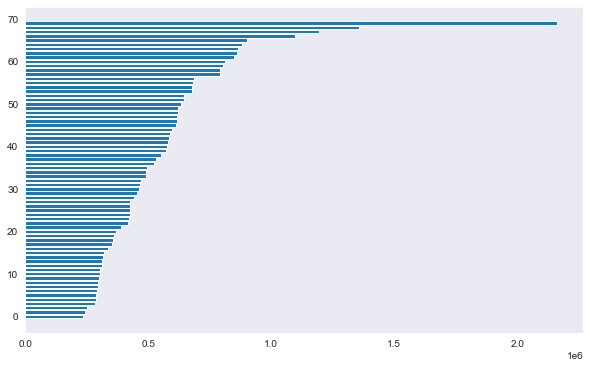

In [92]:
zipcode_fig, ax = plt.subplots(figsize=(10,6))
sns.set_style("dark")

plt.barh(zipcode_df.index, zipcode_df['price'])
ax.ticklabel_format(style='plain', axis = 'y');

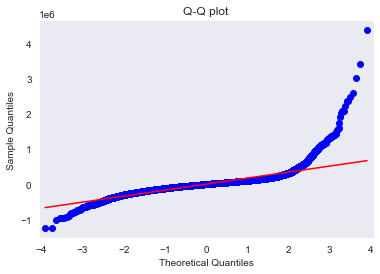

In [93]:
sm.ProbPlot(model_ols_8.resid).qqplot(line='s');
plt.title('Q-Q plot');

[Text(0.5, 0, 'Fitted Values'), Text(0, 0.5, 'sqrt(abs(Residuals))')]

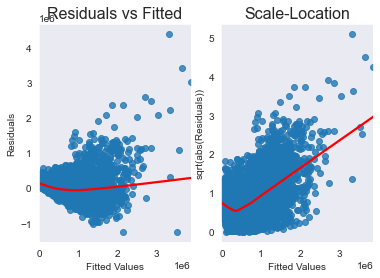

In [94]:
fitted_vals = model_ols_8.predict()
resids = model_ols_8.resid
resids_standardized = model_ols_8.get_influence().resid_studentized_internal

fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')